In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## 구글 드라이브와 연동

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
print(DEVICE)

cuda


In [ ]:
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=True, download=True, transform=transform)
test_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=False, download=True, transform=transform)

In [ ]:
print(train_DS)
print(test_DS)
print(len(train_DS))
print(len(test_DS))

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Test
    StandardTransform
Transform: ToTensor()
60000
10000


In [ ]:
train_DS.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
train_DS.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [ ]:
train_DS.data.shape

torch.Size([60000, 28, 28])

In [ ]:
train_DS.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

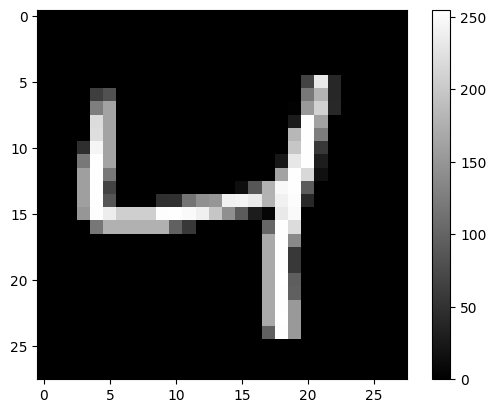

In [ ]:
plt.imshow(train_DS.data[2], cmap='gray')
plt.colorbar()

In [ ]:
print(train_DS.targets)
print(train_DS.targets.shape)

tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000])


In [ ]:
print(train_DS.data)

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

### DataLoader 구경

In [ ]:
BATCH_SIZE = 32
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
print(train_DL.dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
print(len(train_DL.dataset))

60000


In [ ]:
x_batch, y_batch = next(iter(train_DL)) # 데이터 한국자

In [ ]:
print(type(train_DS.data))
print(type(x_batch))
print(x_batch.shape)
print(y_batch.shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 1, 28, 28])
torch.Size([32])


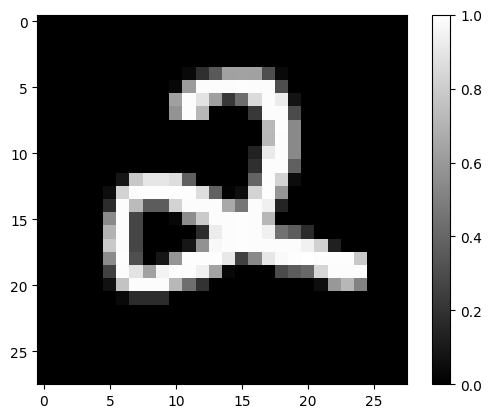

In [ ]:
plt.imshow(x_batch[0].squeeze(), cmap='gray')
plt.colorbar()

In [ ]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Sequential(nn.Linear(28*28, 100),
                                    nn.GELU(),
                                    nn.Linear(100,10))
    def forward(self, x):
        x = torch.flatten(x, start_dim = 1)
        x = self.linear(x)
        return x

In [ ]:
# flatten 확인
x_batch, _ = next(iter(train_DL))
print(x_batch.shape)
flat_images = torch.flatten(x_batch, start_dim = 1)
print(flat_images.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32, 784])


In [ ]:
model = MLP()
print(model)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [ ]:
x_batch, _ = next(iter(train_DL))
print(model(x_batch).shape)

torch.Size([32, 10])


In [ ]:
from torch import optim

LR = 1e-3
EPOCH = 10
criterion = nn.CrossEntropyLoss()


def Train(model, train_DL, criterion, optimizer):
    loss_history =[]
    NoT = len(train_DL.dataset)

    model.train() # train mode로 전환
    for ep in range(EPOCH):
        rloss = 0
        for x_batch, y_batch in train_DL:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            # inference}
            y_hat = model(x_batch)
            # loss
            loss = criterion(y_hat, y_batch)
            # update
            optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
            loss.backward() # backpropagation
            optimizer.step() # weight update
            # loss accumulation
            loss_b = loss.item() * x_batch.shape[0]
            rloss += loss_b
        # print loss
        loss_e = rloss/NoT
        loss_history += [loss_e]
        print(f"Epoch: {ep+1}, train loss: {round(loss_e,3)}")
        print("-"*20)

    return loss_history

In [ ]:
# Cross Entropy 확인 (SoftMax 확인)

import torch.nn.functional as F

y_hat = torch.randn(3, 5) # data는 세 개, 5 종류로 분류하는 문제 가정
print(y_hat) # 가로 축으로 합이 1이 아님, 즉, softmax 통과 전
y_batch = torch.randint(5, (3,))
print(y_batch)

tensor([[ 0.3718, -1.0646, -1.6762,  0.1331,  0.5709],
        [ 0.1788,  0.2651,  0.4804,  0.0315, -0.5601],
        [-1.2318,  0.2904, -0.2422,  3.0015, -0.5779]])
tensor([3, 1, 2])


In [ ]:
# 방법 1
loss = F.cross_entropy(y_hat, y_batch)
print(loss)

# 방법 2
criterion = nn.CrossEntropyLoss()
print(criterion(y_hat, y_batch))

# 방법 3
y_hat_soft = F.softmax(y_hat, dim = 1)
print(y_hat_soft)
loss = 0
for i, val in enumerate(y_hat_soft):
    print(i, val)
    loss = -torch.log(val[y_batch[i]])
print(loss/3)

tensor(2.1051)
tensor(2.1051)
tensor([[0.2963, 0.0705, 0.0382, 0.2334, 0.3616],
        [0.2091, 0.2279, 0.2827, 0.1804, 0.0999],
        [0.0126, 0.0579, 0.0340, 0.8712, 0.0243]])
0 tensor([0.2963, 0.0705, 0.0382, 0.2334, 0.3616])
1 tensor([0.2091, 0.2279, 0.2827, 0.1804, 0.0999])
2 tensor([0.0126, 0.0579, 0.0340, 0.8712, 0.0243])
tensor(1.1272)


Epoch: 1, train loss: 0.309
--------------------
Epoch: 2, train loss: 0.14
--------------------
Epoch: 3, train loss: 0.093
--------------------
Epoch: 4, train loss: 0.069
--------------------
Epoch: 5, train loss: 0.054
--------------------
Epoch: 6, train loss: 0.043
--------------------
Epoch: 7, train loss: 0.034
--------------------
Epoch: 8, train loss: 0.028
--------------------
Epoch: 9, train loss: 0.022
--------------------
Epoch: 10, train loss: 0.019
--------------------


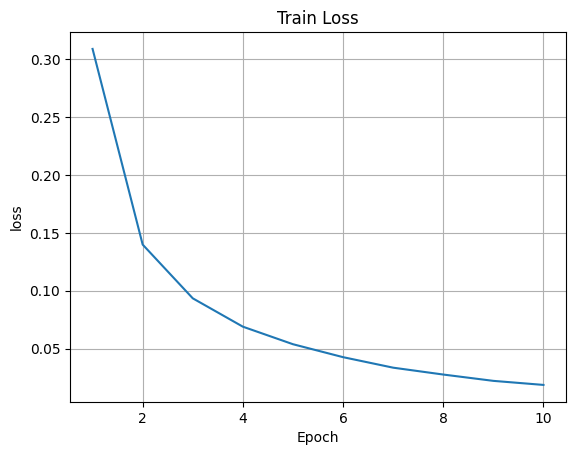

In [ ]:
model = MLP().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LR)
loss_history = Train(model, train_DL, criterion, optimizer)

plt.plot(range(1,EPOCH+1),loss_history)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title("Train Loss")
plt.grid()

In [ ]:
save_model_path = '/content/drive/MyDrive/혁펜하임 실습/Results/MLP_MNIST.pt'
torch.save(model.state_dict(), save_model_path)
model.state_dict()

OrderedDict([('linear.0.weight',
              tensor([[ 0.0186,  0.0051,  0.0094,  ...,  0.0222, -0.0003,  0.0231],
                      [-0.0182, -0.0100,  0.0110,  ...,  0.0318, -0.0093,  0.0340],
                      [ 0.0233, -0.0227,  0.0341,  ...,  0.0143,  0.0084, -0.0086],
                      ...,
                      [-0.0264,  0.0259,  0.0088,  ...,  0.0020,  0.0347,  0.0262],
                      [ 0.0194,  0.0168, -0.0023,  ..., -0.0101, -0.0053, -0.0008],
                      [-0.0222,  0.0237,  0.0206,  ...,  0.0010,  0.0107,  0.0148]],
                     device='cuda:0')),
             ('linear.0.bias',
              tensor([ 0.0027, -0.0971, -0.1400, -0.1377,  0.1401,  0.0101, -0.1656,  0.0374,
                       0.0044,  0.1478,  0.2110,  0.1017,  0.1741, -0.2802,  0.0611, -0.0256,
                       0.0984,  0.0132, -0.0748,  0.0095,  0.0439,  0.4961,  0.0155,  0.4487,
                      -0.0388,  0.2842, -0.1493,  0.1543,  0.2878,  0.0083,  0.077

In [ ]:
load_model = MLP().to(DEVICE)
load_model.load_state_dict(torch.load(save_model_path, map_location=DEVICE))


<ipython-input-29-819f402e6df2>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_model.load_state_dict(torch.load(save_model_path, map_location=DEVICE))


<All keys matched successfully>

In [ ]:
def Test(model, test_DL):
    model.eval()
    with torch.no_grad():
        rcorrect = 0
        for x_batch, y_batch in test_DL:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            # inference
            y_hat = model(x_batch)
            # accuracy accumulation
            pred = y_hat.argmax(dim = 1)
            corrects_b = torch.sum(pred == y_batch).item()
            rcorrect += corrects_b
        accuracy_e = rcorrect/len(test_DL.dataset)*100
    print(f"Test accuracy: {rcorrect}/{len(test_DL.dataset)} ({round(accuracy_e,1)} %)")
            # print(torch.sum(pred == y_batch))
            # print(pred)
            # print(y_batch)

In [ ]:
Test(load_model, test_DL)

Test accuracy: 9767/10000 (97.7 %)


In [ ]:
def Test_plot(model, test_DL):
    model.eval()
    with torch.no_grad():
        x_batch, y_batch = next(iter(test_DL))
        x_batch = x_batch.to(DEVICE)
        y_hat = model(x_batch)
        pred = y_hat.argmax(dim=1)

    x_batch = x_batch.to("cpu")

    plt.figure(figsize=(8,4))
    for idx in range(6):
        plt.subplot(2,3, idx+1, xticks=[], yticks=[])
        plt.imshow(x_batch[idx].permute(1,2,0).squeeze(), cmap="gray")
        pred_class = test_DL.dataset.classes[pred[idx]]
        true_class = test_DL.dataset.classes[y_batch[idx]]
        plt.title(f"{pred_class} ({true_class})", color = "g" if pred_class==true_class else "r")

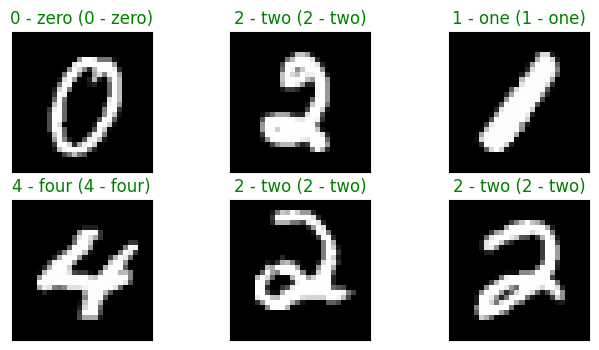

In [ ]:
Test_plot(load_model, test_DL)

In [ ]:
# 파라미터 수 구하기
def count_params(model):
    num = sum([p.numel() for p in model.parameters() if p.requires_grad])
    return num

In [ ]:
print(count_params(load_model))

79510
